# Data Pre-Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
# Read 4 data files, convert to DataFrames.

yaleFile = open('YCOM_2020_Data.csv',encoding="ISO-8859-1")
yaleDf = pd.read_csv(yaleFile)
yaleStateDf = yaleDf.loc[yaleDf['GeoType'] == "State"]

totalDf = yaleStateDf
totalDf = totalDf.drop(9)
totalDf = totalDf.reset_index()
totalDf = totalDf.drop(columns=['index'])

In [ ]:
totalDf

,GeoType,GEOID,GeoName,TotalPop,discuss,discussOppose,reducetax,reducetaxOppose,CO2limits,CO2limitsOppose,localofficials,localofficialsOppose,governor,governorOppose,congress,congressOppose,president,presidentOppose,corporations,corporationsOppose,citizens,citizensOppose,regulate,regulateOppose,supportRPS,supportRPSOppose,drilloffshore,drilloffshoreOppose,drillANWR,drillANWROppose,fundrenewables,fundrenewablesOppose,rebates,rebatesOppose,mediaweekly,mediaweeklyOppose,gwvoteimp,gwvoteimpOppose,teachGW,teachGWOppose,priority,priorityOppose,happening,happeningOppose,human,humanOppose,consensus,consensusOppose,worried,worriedOppose,personal,personalOppose,harmUS,harmUSOppose,devharm,devharmOppose,futuregen,futuregenOppose,harmplants,harmplantsOppose,timing,timingOppose,affectweather,affectweatherOppose
0,State,1,Alabama,3765888,27.973,71.887,62.843,35.206,62.690,36.574,50.262,15.043,48.997,15.608,53.025,21.209,54.827,13.532,64.191,10.574,58.065,11.876,70.433,28.104,58.386,40.980,62.556,35.986,35.529,62.866,82.285,16.686,79.634,19.105,19.152,80.114,48.467,40.401,75.113,24.470,44.841,27.475,63.347,14.144,50.909,37.789,45.095,27.334,55.752,44.084,37.439,49.158,54.608,31.356,58.001,24.780,60.989,22.537,62.641,21.698,50.425,49.575,53.326,7.127
1,State,2,Alaska,552380,39.532,59.610,64.150,34.160,64.217,35.151,49.862,16.004,45.292,18.031,55.131,22.345,55.470,14.728,68.648,9.489,61.751,9.927,71.899,26.583,59.217,39.290,52.474,46.826,31.700,67.161,85.767,13.191,82.040,16.802,26.879,72.302,56.101,32.978,75.946,23.675,46.416,26.556,70.159,13.810,53.769,35.449,54.596,27.633,61.018,38.567,39.119,52.090,59.708,31.641,64.119,24.607,68.425,20.811,71.070,20.788,52.617,47.383,60.916,5.940
2,State,4,Arizona,5312901,37.969,61.774,64.020,34.538,65.537,33.906,51.664,16.189,49.648,16.115,57.470,20.061,57.732,12.226,68.655,9.946,61.715,11.266,73.034,26.409,63.265,35.750,57.049,41.233,35.544,63.017,85.306,13.979,81.504,17.940,28.132,71.108,57.574,32.298,76.645,23.210,50.651,25.419,70.853,12.796,56.019,33.452,54.533,26.479,62.897,37.143,42.826,47.676,61.102,29.899,64.003,23.302,67.873,19.958,68.882,20.502,55.609,44.391,63.547,6.268
3,State,5,Arkansas,2284725,30.265,69.447,65.832,32.830,63.568,35.856,49.411,15.601,47.973,16.318,54.183,22.553,54.499,15.030,65.532,10.172,59.334,11.340,70.404,27.993,59.651,39.561,58.341,39.750,34.908,63.299,82.303,16.872,79.488,19.262,20.384,79.094,48.951,39.904,75.816,23.670,44.457,26.781,65.637,14.500,52.163,36.722,46.208,28.625,58.062,41.847,37.132,50.253,56.197,31.783,60.591,24.984,65.486,20.477,66.876,20.901,50.170,49.830,55.720,7.074
4,State,6,California,30075104,42.054,57.705,72.054,26.950,72.055,27.547,56.399,14.689,52.481,17.313,63.884,16.293,65.353,9.462,72.925,9.451,67.269,10.061,76.440,22.116,69.002,29.800,42.012,56.977,26.879,71.754,86.349,12.461,83.253,15.593,27.962,71.169,61.585,28.134,81.489,18.280,60.355,17.831,77.228,8.262,63.753,26.735,61.633,20.228,70.615,29.272,50.396,40.363,67.761,23.077,71.420,16.805,76.130,14.015,76.773,13.980,62.688,37.312,69.280,4.928
5,State,8,Colorado,4271322,40.053,59.815,64.317,34.436,68.210,31.301,51.977,16.231,49.644,17.163,59.591,20.048,58.689,11.876,70.760,9.722,64.627,10.810,74.002,25.577,64.716,34.777,45.405,54.590,30.704,69.794,86.457,12.942,82.579,16.996,30.892,68.380,57.967,32.084,76.878,23.059,50.840,25.287,72.025,12.189,57.223,32.157,56.980,26.181,63.439,36.622,41.965,49.696,61.447,30.664,65.150,23.307,70.650,18.492,71.517,19.547,55.998,44.002,65.726,6.015
6,State,9,Connecticut,2828879,38.791,61.017,72.377,27.011,73.152,26.041,54.670,13.347,54.495,12.835,63.976,14.544,63.764,8.811,73.126,8.944,66.713,9.257,77.744,21.097,70.110,29.065,52.007,47.201,30.713,69.063,87.685,11.819,84.283,14.999,26.630,73.082,55.997,33.399,80.414,19.209,54.330,18.179,73.851,9.868,61.104,29.041,59.902,21.964,67.834,32.107,43.997,46.762,63.871,26.735,68.618,19.723,76.032,14.808,75.957,15.500,58.110,41.890,68.895,5.400
7,State,10,Delaware,746069,32.632,67.675,65.264,34.230,67.134,32.521,55.500,15

In [ ]:
redStates = [1, 2, 5, 16, 18, 20, 21, 22, 28, 29, 30, 31, 38, 40, 45, 46, 47, 49, 54, 56]
blueStates = [6, 9, 10, 15, 17, 24, 25, 34, 36, 41, 44, 50, 53]
purpleStates = [4, 8, 12, 13, 19, 23, 26, 27, 32, 33, 35, 37, 39, 42, 48, 51, 55]

# Graph Creation

In [ ]:
import networkx as nx
G = nx.Graph()

states = totalDf["GEOID"].unique().tolist()

column_ID = 'GEOID'

G.add_nodes_from(nodes_for_adding=states)

# finding number of edges and nodes
print(G.number_of_edges())
print(G.number_of_nodes())

0
50


In [ ]:
numbers = []
for i in range(len(states)):
  iData = totalDf.loc[totalDf['GEOID']==states[i], :]
  iData = iData.iloc[:,4:]
  iData = iData.values.tolist()
  iData = np.array(iData)
  numbers.append(iData)

print(numbers[0])

[[27.973 71.887 62.843 35.206 62.69  36.574 50.262 15.043 48.997 15.608
  53.025 21.209 54.827 13.532 64.191 10.574 58.065 11.876 70.433 28.104
  58.386 40.98  62.556 35.986 35.529 62.866 82.285 16.686 79.634 19.105
  19.152 80.114 48.467 40.401 75.113 24.47  44.841 27.475 63.347 14.144
  50.909 37.789 45.095 27.334 55.752 44.084 37.439 49.158 54.608 31.356
  58.001 24.78  60.989 22.537 62.641 21.698 50.425 49.575 53.326  7.127]]


In [ ]:
print(numbers[0])
asdf = numbers[0]
print(np.linalg.norm(numbers[0]-numbers[1]))
w,h = len(states),len(states);
Matrix = [[0 for x in range(w)] for y in range(h)] 
for i in range(len(states)):
  for j in range(len(states)):
    Matrix[i][j] = np.linalg.norm(numbers[i]-numbers[j])

[[27.973 71.887 62.843 35.206 62.69  36.574 50.262 15.043 48.997 15.608
  53.025 21.209 54.827 13.532 64.191 10.574 58.065 11.876 70.433 28.104
  58.386 40.98  62.556 35.986 35.529 62.866 82.285 16.686 79.634 19.105
  19.152 80.114 48.467 40.401 75.113 24.47  44.841 27.475 63.347 14.144
  50.909 37.789 45.095 27.334 55.752 44.084 37.439 49.158 54.608 31.356
  58.001 24.78  60.989 22.537 62.641 21.698 50.425 49.575 53.326  7.127]]
37.0820850950968


In [ ]:
asdf = Matrix[0][1]
print(asdf)

37.0820850950968


In [ ]:
for i in range(len(states)):
  for j in range(len(states)):
    if i<j:
      if(Matrix[i][j] < 15):
        G.add_edge(states[i],states[j])
print(G.number_of_edges())

67


In [ ]:
print(len(G.nodes()))
print(G.number_of_edges())

50
67


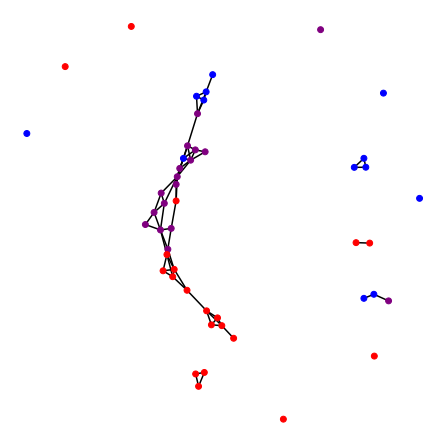

In [ ]:
options = {
    'node_size': 35,
    'width': 1.5,
}
color_map=[]
stateTypes=[0,0,0]
for i in G:
  if i in redStates:
    color_map.append('red')
    stateTypes[0]+=1
  elif i in blueStates:
    color_map.append('blue')
    stateTypes[1]+=1
  else:
    color_map.append('purple')
    stateTypes[2]+=1
plt.figure(figsize=(6, 6)) 
posSub = nx.spring_layout(G)
nx.draw(G, node_color=color_map, **options, pos = posSub)
plt.show()


In [ ]:
print(stateTypes)

[20, 13, 17]


In [ ]:
# method to find largest connected component
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

Gc = max(connected_component_subgraphs(G), key=len)

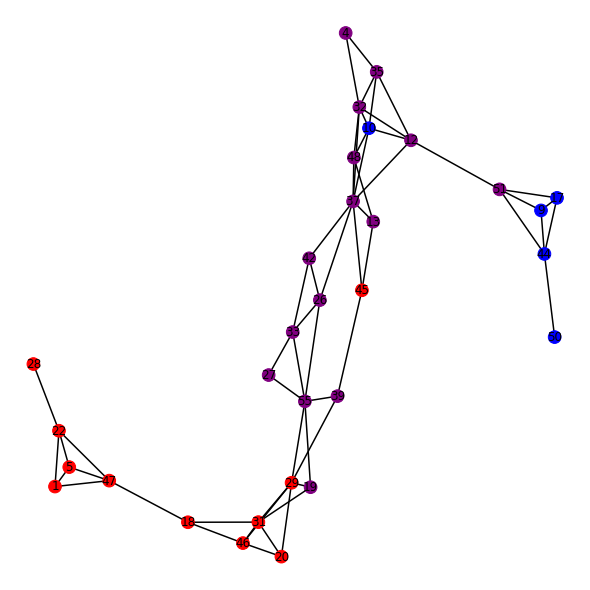

In [ ]:
# drawing the largest connected component of graph 
# color coded by borough
options = {
    'node_size': 160,
    'width': 1.5,
}
color_map_gc=[]
stateTypesGc=[0,0,0]
for i in Gc:
  if i in redStates:
    color_map_gc.append('red')
    stateTypesGc[0]+=1
  elif i in blueStates:
    color_map_gc.append('blue')
    stateTypesGc[1]+=1
  else:
    color_map_gc.append('purple')
    stateTypesGc[2]+=1
plt.figure(figsize=(8, 8)) 
posSub = nx.spring_layout(Gc)
nx.draw(Gc, node_color=color_map_gc, **options, pos = posSub, with_labels=True)
plt.show()

In [ ]:
gcStateList = []
for i in Gc.nodes():
  toAdd = str(totalDf.loc[totalDf['GEOID'] == i,"GeoName"])
  split = toAdd.split()
  stateName = split[1]
  gcStateList.append(stateName)
print(gcStateList)

['Alabama', 'Arizona', 'Arkansas', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'New', 'New', 'North', 'Ohio', 'Pennsylvania', 'Rhode', 'South', 'South', 'Tennessee', 'Texas', 'Vermont', 'Virginia', 'Wisconsin']


In [ ]:
print(stateTypesGc)

[11, 5, 15]


Average of blue/purple/red counties overall and in subcomponent
Average of all counties in subcomponent

